# Finding Outliers 

In [76]:
import numpy as np
# Load the required dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [210]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

In [14]:
df.head(20)

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN
5,6,I code primarily as a hobby,Under 18 years old,"Student, full-time",NaN,Apples,NaN,Primary/elementary school,"School (i.e., University, College, etc);Online...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
6,7,"I am not primarily a developer, but I write co...",35-44 years old,"Employed, full-time",Remote,Apples,I don’t code outside of work,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Stack Overflow;Written...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,NaN,NaN
7,8,I am learning to code,18-24 years old,"Student, full-time;Not employed, but looking f...",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Video-based Online Cou...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Difficult,NaN,NaN
8,9,I code primarily as a hobby,45-54 years old,"Employed, full-time",In-person,Apples,Hobby,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",Books / Physical media;Other online resources ...,Stack Overflow;Written-based Online Courses,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,NaN,NaN
9,10,I am a developer by profession,35-44 years old,"Independent contractor, freelancer, or self-em...",Remote,Apples,Bootstrapping a business,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN


In [25]:
missing_industry = df['Industry'].isna().sum()
total_values = df['Industry'].value_counts()
total_values

Industry
Software Development                          11918
Other:                                         3077
Fintech                                        1641
Internet, Telecomm or Information Services     1629
Banking/Financial Services                     1371
Healthcare                                     1277
Manufacturing                                  1265
Retail and Consumer Services                   1264
Government                                      962
Media & Advertising Services                    894
Higher Education                                890
Transportation, or Supply Chain                 859
Computer Systems Design and Services            844
Energy                                          578
Insurance                                       389
Name: count, dtype: int64

# Plot the Distribution of Industry

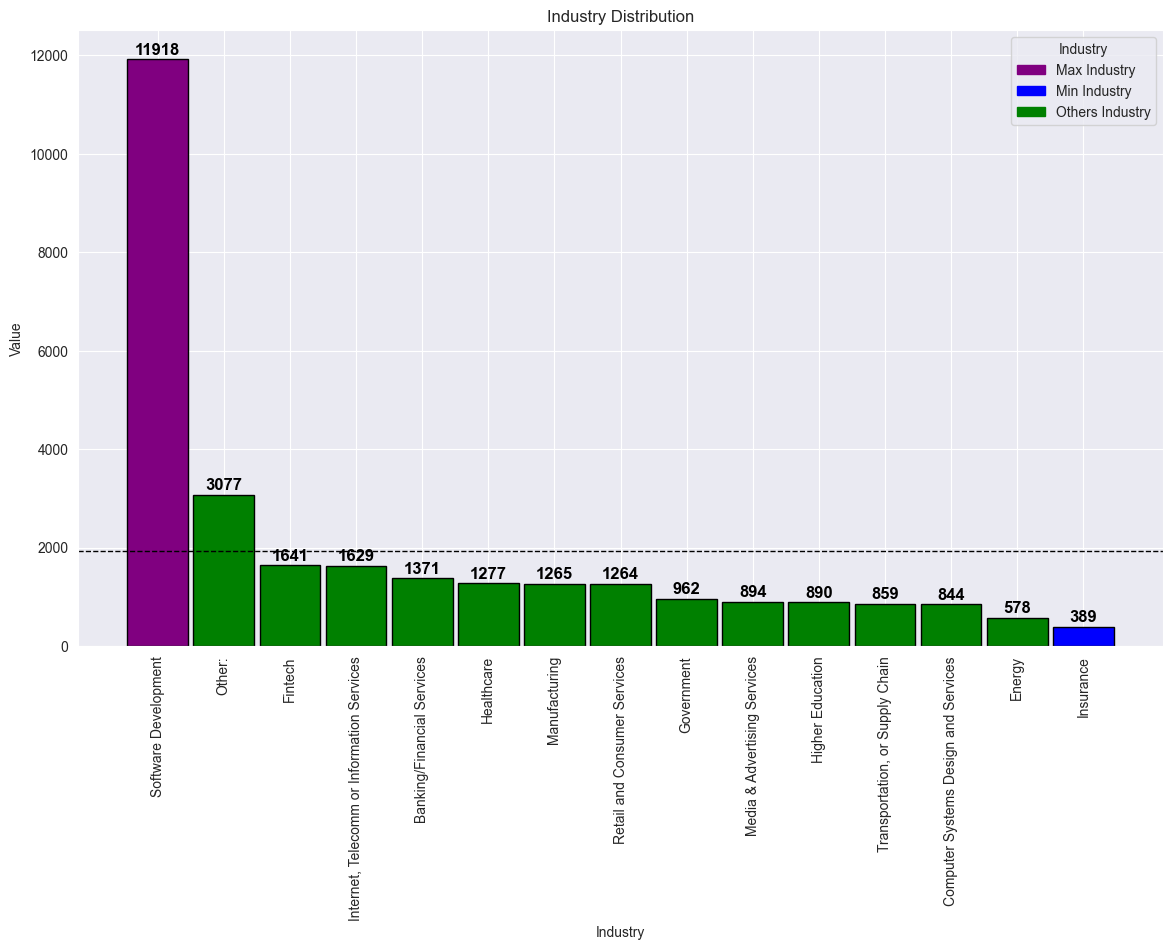

In [196]:
import matplotlib.patches as mpatches

max_ind = total_values.idxmax()
min_ind = total_values.idxmin()
colors = ['purple' if industry == max_ind else 'blue' if industry == min_ind else 'green' for industry in
          total_values.index]
plt.figure(figsize=(14, 8))
bars = plt.bar(total_values.index, total_values.values, color=colors, width=0.92, edgecolor='black')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 100, str(height), ha='center', fontsize='12', color='black',
             fontweight='bold')
avg_val = round(total_values.mean(), 2)
plt.axhline(avg_val, color='black', linestyle='--', linewidth=1, label=f"Avg Value: {avg_val}")
plt.xlabel("Industry")
plt.ylabel("Value")
plt.title("Industry Distribution")
legend_colors = [
    mpatches.Patch(color='purple', label='Max Industry'),
    mpatches.Patch(color='blue', label='Min Industry'),
    mpatches.Patch(color='green', label='Others Industry')
]
plt.legend(handles=legend_colors, title='Industry')
plt.xticks(rotation=90)
plt.show()

#  Identify High Compensation Outliers
Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).

### Identify respondents with extremely high yearly compensation.

In [85]:
top_1_threshold = df['ConvertedCompYearly'].quantile(0.99)
very_high_comp = df[df['ConvertedCompYearly'] > top_1_threshold]
very_high_comp

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
529,530,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,...,40.0,20.0,0.0,30.0,10.0,0.0,Appropriate in length,Easy,650000.0,6.0
545,546,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Profe...,"Secondary school (e.g. American high school, G...",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,30.0,5.0,5.0,10.0,0.0,0.0,Appropriate in length,Easy,400000.0,8.0
594,595,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,10.0,10.0,20.0,20.0,5.0,0.0,Appropriate in length,Easy,432000.0,8.0
751,752,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Bootstrapping a business;Professional de...,Some college/university study without earning ...,Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,402000.0,NaN
828,829,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Bootstrapping a business;Professional de...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,30.0,10.0,0.0,5.0,0.0,0.0,Appropriate in length,Neither easy nor difficult,1000000.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40188,40189,"I am not primarily a developer, but I write co...",35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Bootstrapping a business;Professional de...,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,429429.0,NaN
40288,40289,I am a developer by profession,18-24 years old,"Employed, full-time;Student, part-time","Hybrid (some remote, some in-person)",Apples,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Books;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,438767.0,NaN
40373,40374,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Apples,Bootstrapping a business;Freelance/contract work,"Secondary school (e.g. American high school, G...",Colleague;On the job training;Other online res...,Technical documentation;Written Tutorials;Stac...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,644437.0,NaN
40952,40953,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby,Some college/university study without earning ...,Books / Physical media;Colleague;Other online ...,Technical documentation;Blogs;Stack Overflow,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,750000.0,NaN


### Calculate basic statistics (mean, median, and standard deviation) for ConvertedCompYearly.

In [89]:
mean_comp = df['ConvertedCompYearly'].mean()
median_comp = df['ConvertedCompYearly'].median()
std_comp = df['ConvertedCompYearly'].std()
print(f"Mean Comp: {round(mean_comp, 2)}")
print(f"Median Comp: {round(median_comp, 2)}")
print(f"Standard Deviation: {round(std_comp, 2)}")

Mean Comp: 86155.29
Median Comp: 65000.0
Standard Deviation: 186756.97


### Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).

In [90]:
# Define the threshold
threshold = mean_comp + 3 * std_comp
print(f"Threshold: {round(threshold, 2)}")

Threshold: 646426.21


In [92]:
# Now find the extremely high compensation which excedded the threshold
extremely_high_threshold = df[df['ConvertedCompYearly'] > threshold]
len(extremely_high_threshold)

89

/var/folders/tv/ccg9r04d74l7pmss8y9glmsm0000gn/T/ipykernel_3334/2969876217.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


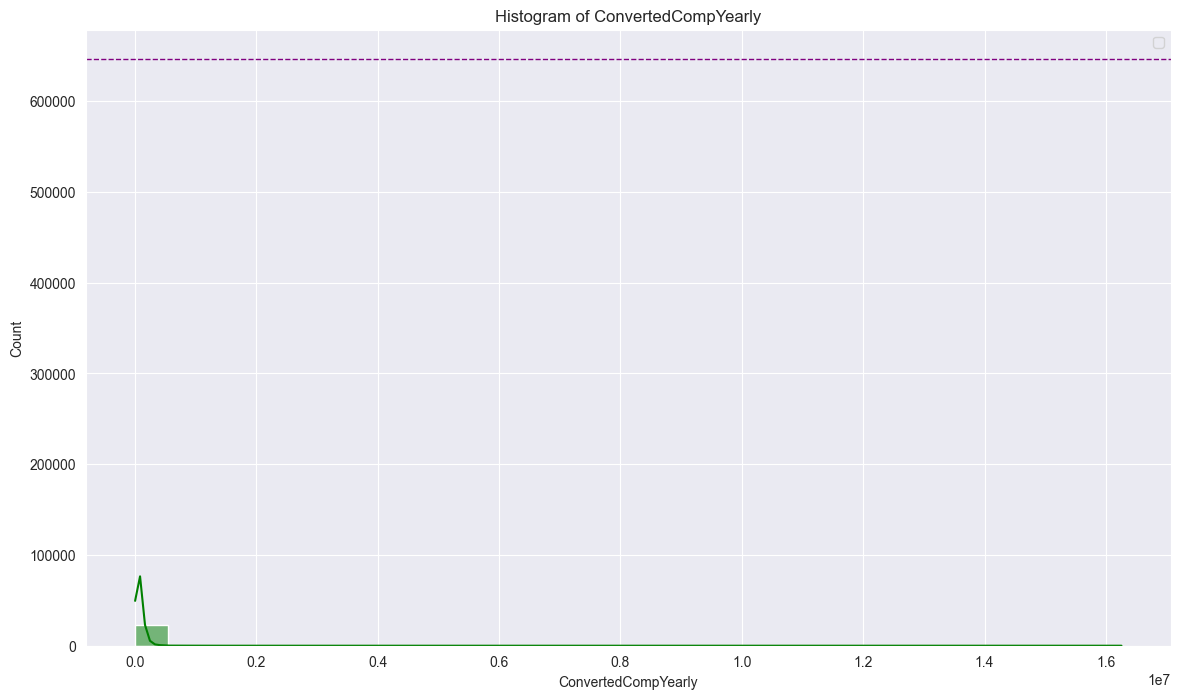

In [113]:
# Visualize the data in hist
plt.figure(figsize=(14, 8))
sns.histplot(df['ConvertedCompYearly'], bins=30, kde=True, color='green')
plt.axhline(threshold, linestyle='--', linewidth=1, color='purple')
plt.title("Histogram of ConvertedCompYearly")
plt.xlabel("ConvertedCompYearly")
plt.ylabel("Count")
plt.legend()
plt.show()

# Detect Outliers in Compensation

In [115]:
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"IQR: {IQR}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

IQR: 75259.5
Lower Bound: -80177.25
Upper Bound: 220860.75


In [118]:
# DETECT OUTLIERS
outliers = df[(df['ConvertedCompYearly'] > lower_bound) | (df['ConvertedCompYearly'] < upper_bound)]
print(f"Outliers: {len(outliers)}")

Outliers: 23435


In [120]:
# Visualize the distribution and outliers using a box plot
outliers['ConvertedCompYearly'].value_counts()

ConvertedCompYearly
64444.0     321
53703.0     308
75184.0     230
85925.0     226
107406.0    208
           ... 
17435.0       1
47072.0       1
60224.0       1
16588.0       1
116844.0      1
Name: count, Length: 6113, dtype: int64

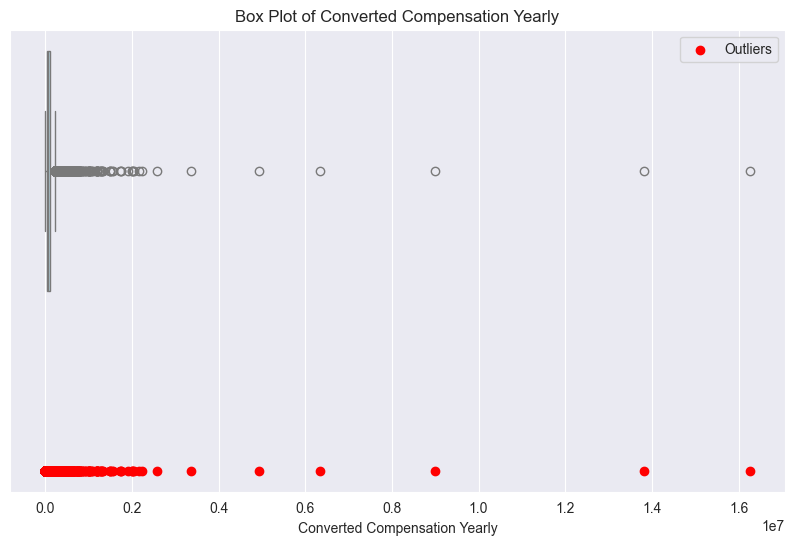

In [126]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='ConvertedCompYearly', color='lightblue')

# Mark the outliers in the plot with red dots
plt.scatter(outliers['ConvertedCompYearly'], [1] * len(outliers), color='red', label='Outliers', zorder=5)

plt.title('Box Plot of Converted Compensation Yearly')
plt.xlabel('Converted Compensation Yearly')
plt.legend()
plt.show()

In [130]:
df_no_outliers = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]
df_no_outliers

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
72,73,I am a developer by profession,18-24 years old,"Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time","Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional development or self-paced learning from online courses;Freelance/contract work,"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)","On the job training;Other online resources (e.g., videos, blogs, forum, online community);School (i.e., University, College, etc)",Technical documentation;Blogs;Written Tutorials;Stack Overflow;Social Media;How-to videos;Interactive tutorial;AI,...,65.0,100.0,100.0,100.0,50.0,90.0,Too long,Easy,7322.0,10.0
374,375,"I am not primarily a developer, but I write code sometimes as part of my work/studies",25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional development or self-paced learning from online courses,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)","Books / Physical media;Colleague;On the job training;Other online resources (e.g., videos, blogs, forum, online community);School (i.e., University, College, etc);Online Courses or Certification",Written Tutorials;Stack Overflow;Written-based Online Courses,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,30074.0,NaN
379,380,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Bootstrapping a business,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Books / Physical media;Other online resources (e.g., videos, blogs, forum, online community);Online Courses or Certification",Technical documentation;Books;Social Media;Written-based Online Courses,...,0.0,0.0,0.0,0.0,0.0,0.0,Too long,Difficult,91295.0,10.0
385,386,I am a developer by profession,35-44 years old,"Independent contractor, freelancer, or self-employed",Remote,Apples,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Books / Physical media;On the job training;Other online resources (e.g., videos, blogs, forum, online community);Online Courses or Certification",Technical documentation;Blogs;Written Tutorials;Stack Overflow,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,53703.0,NaN
389,390,I am a developer by profession,25-34 years old,"Employed, full-time;Student, part-time",Remote,Apples,Hobby;School or academic work,Some college/university study without earning a degree,"Books / Physical media;Colleague;On the job training;Other online resources (e.g., videos, blogs, forum, online community);School (i.e., University, College, etc)",Written Tutorials;Stack Overflow;Coding sessions (live or recorded);Video-based Online Courses,...,20.0,30.0,5.0,20.0,10.0,5.0,Too long,Easy,110000.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41179,41180,I am a developer by profession,25-34 years old,"Employed, full-time;Employed, part-time",Remote,Apples,Contribute to open-source projects;Bootstrapping a business;Freelance/contract work,Some college/university study without earning a degree,"Books / Physical media;On the job training;Other online resources (e.g., videos, blogs, forum, online community);Online Courses or Certification;Coding Bootcamp",Technical documentation;Stack Overflow;Coding sessions (live or recorded);Social Media;Written-based Online Courses;AI,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,15600.0,NaN
41180,41181,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Other online resources (e.g., videos, blogs, forum, online community);Other (please specify):",Technical d

#  Correlation Analysis

In [138]:
df

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other (please specify):,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;Colleague;On the job training;Other online resources (e.g., videos, blogs, forum, online community)",Technical documentation;Blogs;Books;Written Tutorials;Stack Overflow,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other (please specify):,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Books / Physical media;Colleague;On the job training;Other online resources (e.g., videos, blogs, forum, online community);School (i.e., University, College, etc)",Technical documentation;Blogs;Books;Written Tutorials;Stack Overflow;Coding sessions (live or recorded);Social Media,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning a degree,"Other online resources (e.g., videos, blogs, forum, online community);School (i.e., University, College, etc);Online Courses or Certification",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)","Other online resources (e.g., videos, blogs, forum, online community)",Technical documentation;Blogs;Written Tutorials;Stack Overflow;Social Media;Video-based Online Courses,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65432,65433,I am a developer by profession,18-24 years old,"Employed, full-time",Remote,Apples,Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","On the job training;School (i.e., University, College, etc)",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65433,65434,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65434,65435,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, forum, online community)",Technical documentation;Stack Overflow;Social Media,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65435,65436,I am a developer by profession,18-24 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Professional development or self-paced learning from online courses,"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)","On the job training;Other online resources (e.g., videos, blogs, forum, online community)",Technical documentation;Blogs;Written Tutorials;Stack Overflow,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [141]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
ResponseId,1.000000,-0.000000,0.011955,-0.002406,-0.015738,-0.014197,-0.001908,0.001843,-0.002968,0.001991,-0.005365,-0.005865,-0.008363,0.002425
CompTotal,-0.000000,0.000000,0.028766,-0.004891,-0.002719,-0.003033,-0.006311,-0.005893,-0.004585,-0.004494,-0.003198,-0.003045,0.080457,-0.015770
WorkExp,0.011955,0.028766,1.000000,-0.026490,-0.067241,-0.104525,-0.065352,-0.101461,-0.046958,-0.088090,-0.113707,-0.108279,0.154114,0.097322
JobSatPoints_1,-0.002406,-0.004891,-0.026490,1.000000,0.445710,0.633765,0.618618,0.603157,0.627385,0.597527,0.585087,0.607792,0.020306,0.094068
JobSatPoints_4,-0.015738,-0.002719,-0.067241,0.445710,1.000000,0.526254,0.449400,0.459253,0.438763,0.472516,0.499387,0.528395,0.018197,0.029677
JobSatPoints_5,-0.014197,-0.003033,-0.104525,0.633765,0.526254,1.000000,0.613933,0.607949,0.630353,0.619644,0.643538,0.690993,-0.023281,0.049224
JobSatPoints_6,-0.001908,-0.006311,-0.065352,0.618618,0.449400,0.613933,1.000000,0.692166,0.645094,0.632211,0.592528,0.604585,-0.008518,0.051341
JobSatPoints_7,0.001843,-0.005893,-0.101461,0.603157,0.459253,0.607949,0.692166,1.000000,0.698240,0.659558,0.642905,0.618444,-0.036431,0.038339
JobSatPoints_8,-0.002968,-0.004585,-0.046958,0.627385,0.438763,0.630353,0.645094,0.698240,1.000000,0.655668,0.617320,0.625185,-0.011080,0.058258
JobSatPoints_9,0.001991,-0.004494,-0.088090,0.597527,0.472516,0.619644,0.632211,0.659558,0.655668,1.000000,0.663628,0.650676,-0.015867,0.039173


In [211]:
df['Age'].value_counts()

Age
25-34 years old       23911
35-44 years old       14942
18-24 years old       14098
45-54 years old        6249
55-64 years old        2575
Under 18 years old     2568
65 years or older       772
Prefer not to say       322
Name: count, dtype: int64

### Age colum is reformated

In [212]:
import numpy as np
def age_distribution(column):
    if '65 years or older' in column:
        return 66
    elif 'Under 18 years old' in column:
        return 17
    elif 'Prefer not to say' in column:
        return np.nan
    else:
        other_ages = column.split(' years old')
        age_split = other_ages[0].split('-')
        start_age = int(age_split[0])
        end_age = int(age_split[1])
        return (start_age + end_age)//2
df['Age'] = df['Age'].apply(age_distribution)

In [213]:
df['Age'].value_counts()

Age
29.0    23911
39.0    14942
21.0    14098
49.0     6249
59.0     2575
17.0     2568
66.0      772
Name: count, dtype: int64

In [200]:
df

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,17.0,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,39.0,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other (please specify):,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;Colleague;On the job training;Other online resources (e.g., videos, blogs, forum, online community)",Technical documentation;Blogs;Books;Written Tutorials;Stack Overflow,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,49.0,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other (please specify):,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Books / Physical media;Colleague;On the job training;Other online resources (e.g., videos, blogs, forum, online community);School (i.e., University, College, etc)",Technical documentation;Blogs;Books;Written Tutorials;Stack Overflow;Coding sessions (live or recorded);Social Media,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,21.0,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning a degree,"Other online resources (e.g., videos, blogs, forum, online community);School (i.e., University, College, etc);Online Courses or Certification",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,21.0,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)","Other online resources (e.g., videos, blogs, forum, online community)",Technical documentation;Blogs;Written Tutorials;Stack Overflow;Social Media;Video-based Online Courses,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65432,65433,I am a developer by profession,21.0,"Employed, full-time",Remote,Apples,Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","On the job training;School (i.e., University, College, etc)",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65433,65434,I am a developer by profession,29.0,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65434,65435,I am a developer by profession,29.0,"Employed, full-time",In-person,Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, forum, online community)",Technical documentation;Stack Overflow;Social Media,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65435,65436,I am a developer by profession,21.0,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Professional development or self-paced learning from online courses,"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)","On the job training;Other online resources (e.g., videos, blogs, forum, online community)",Technical documentation;Blogs;Written Tutorials;Stack Overflow,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [214]:
mean_age = df['Age'].mean()
df['Age'] = df['Age'].fillna(int(mean_age))

In [216]:
df['Age'].value_counts()

Age
29.0    23911
39.0    14942
21.0    14098
49.0     6249
59.0     2575
17.0     2568
66.0      772
32.0      322
Name: count, dtype: int64

In [223]:
only_numeric = df.select_dtypes(include=['number'])
correlation_matrix = only_numeric.corr()
print(correlation_matrix['Age'])

ResponseId            -0.037706
Age                    1.000000
CompTotal             -0.002838
WorkExp                0.849078
JobSatPoints_1        -0.028073
JobSatPoints_4        -0.075885
JobSatPoints_5        -0.101544
JobSatPoints_6        -0.050624
JobSatPoints_7        -0.082462
JobSatPoints_8        -0.046177
JobSatPoints_9        -0.081808
JobSatPoints_10       -0.114303
JobSatPoints_11       -0.107098
ConvertedCompYearly    0.121319
JobSat                 0.069496
Name: Age, dtype: float64


# VISUALIZE DATA WITH HEATMAP

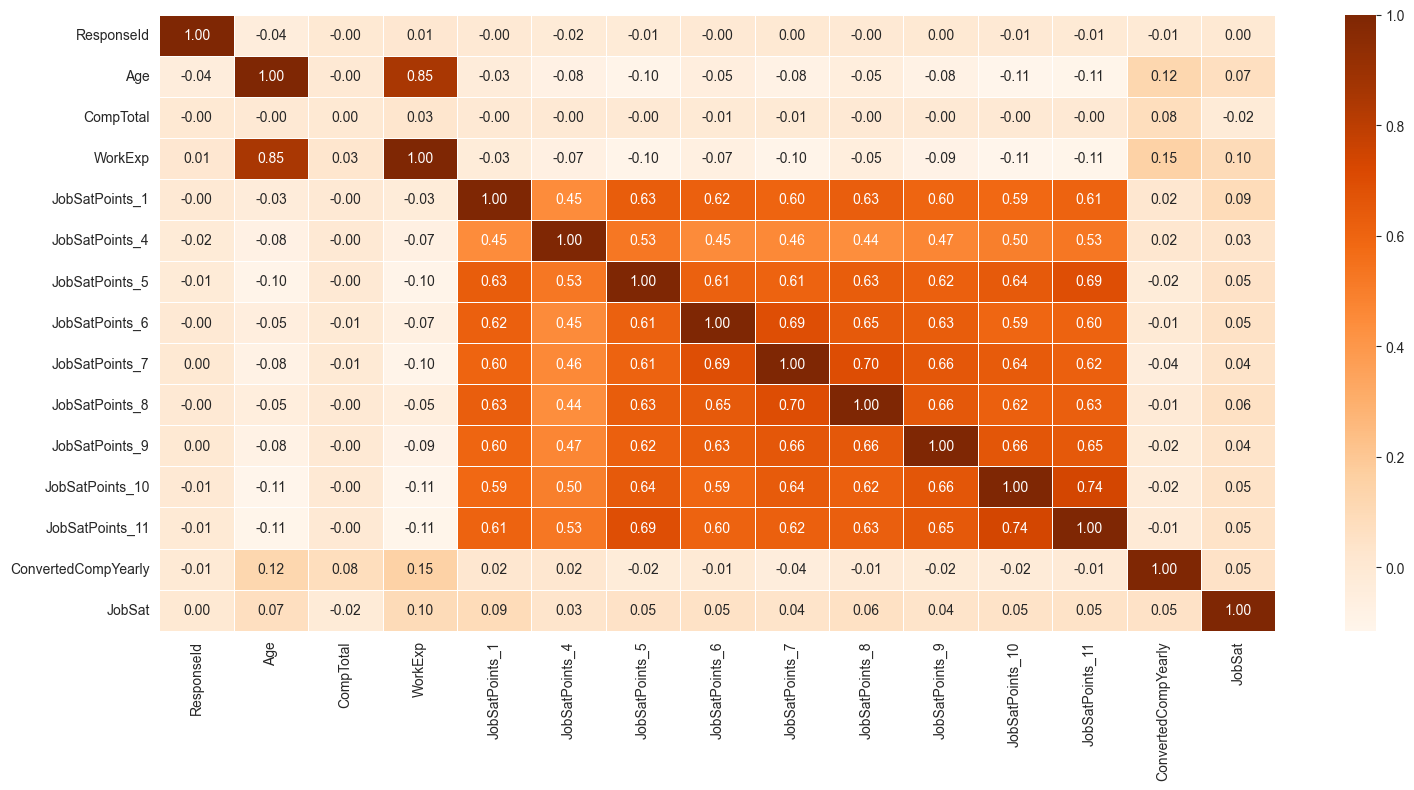

In [234]:
# Total Daraframe
plt.figure(figsize=(18, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Oranges', linewidths=0.5, fmt='.2f')
plt.show()

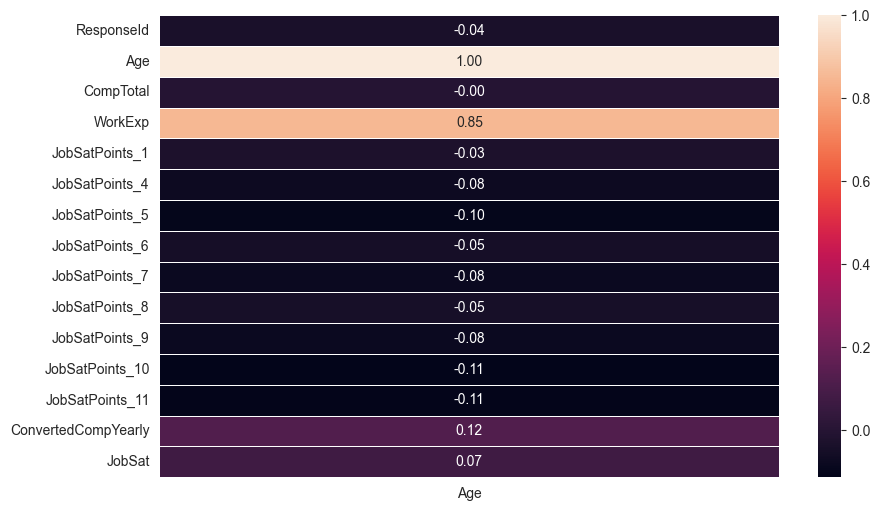

In [232]:
# Only gae Heatmeap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix[['Age']], annot=True, linewidths=0.5, fmt='.2f')
plt.show()